In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [9]:
plt.rc('font', family = 'AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지

In [3]:
asos_df = pd.read_csv('/Volumes/ESD-ISO/project_preson/LSTM/LSTM_data/ASOS_data_preprocessed_V2.csv')

In [4]:
rain_times = asos_df[asos_df['rainy_day'] > 0]['tm']

In [5]:
pd.to_datetime(rain_times)

381     1980-04-09 09:00:00
382     1980-04-09 15:00:00
383     1980-04-09 21:00:00
408     1980-04-16 03:00:00
409     1980-04-16 09:00:00
                ...        
60552   2024-12-21 00:00:00
60555   2024-12-21 03:00:00
60558   2024-12-21 06:00:00
60561   2024-12-21 09:00:00
60672   2024-12-26 00:00:00
Name: tm, Length: 4296, dtype: datetime64[ns]

In [6]:
asos_df['tm'] = pd.to_datetime(asos_df['tm'])
rain_times = pd.to_datetime(rain_times)
asos_df = asos_df.sort_values(by='tm')

rain_periods = []

for rain_time in rain_times:
    start_time = rain_time - pd.Timedelta(hours=24)
    period = asos_df[(asos_df['tm'] >= start_time) & (asos_df['tm'] <= rain_time)]
    rain_periods.append(period)

In [7]:
# hm 습도
# pv 증기압
# td 이슬점온도
# pa 현지기압
# ps 해면기압
# dc10Tca 전운량
# clfmAbbrCd 운형
# lcsCh 최저운고
# m005Te 5cm 지중온도
# m01Te 10cm 지중온도
# m02Te	20cm 지중온도
# m03Te	30cm 지중온도
# vs	시정
# ws	풍속
# wd	풍향
# rn	강수량
# tm 시간

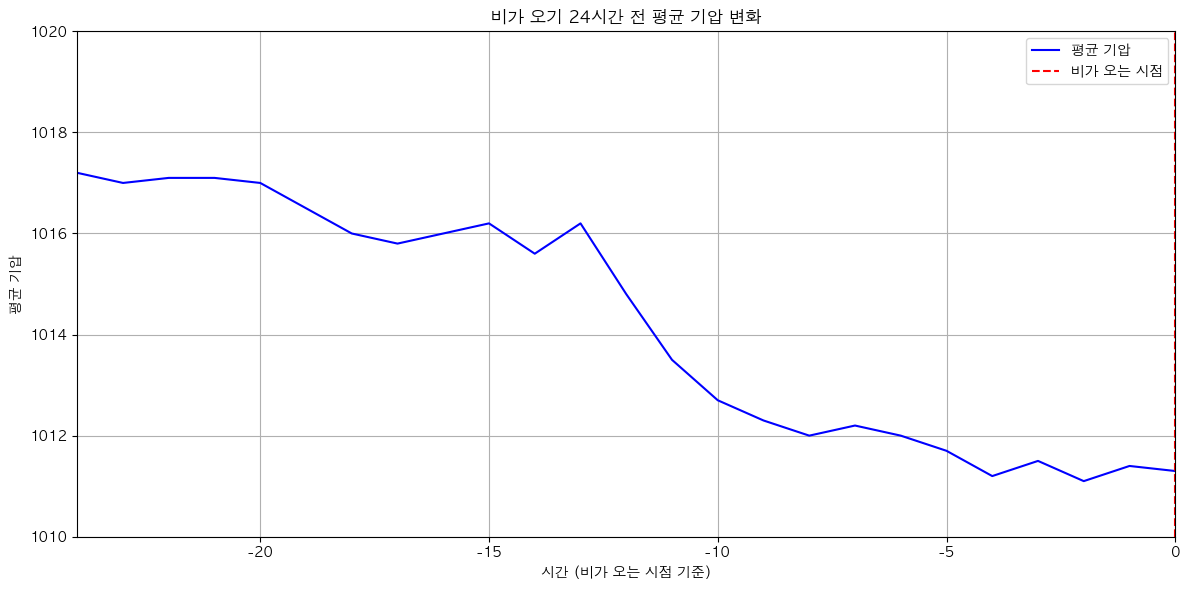

In [10]:
# 모든 period 데이터를 합쳐 평균 계산
all_periods = pd.concat(rain_periods, ignore_index=True)

# 시간 기준으로 그룹화하여 평균 계산
# 'time'은 상대 시간(예: 0시간, -1시간 등)으로 변환했다고 가정
all_periods['relative_time'] = (all_periods['tm'] - all_periods['tm'].max()).dt.total_seconds() / 3600
mean_data = all_periods.groupby('relative_time')['pa'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 기압', color='blue')

# 그래프 설정
plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 기압')
plt.ylim([1010, 1020])
plt.title('비가 오기 24시간 전 평균 기압 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

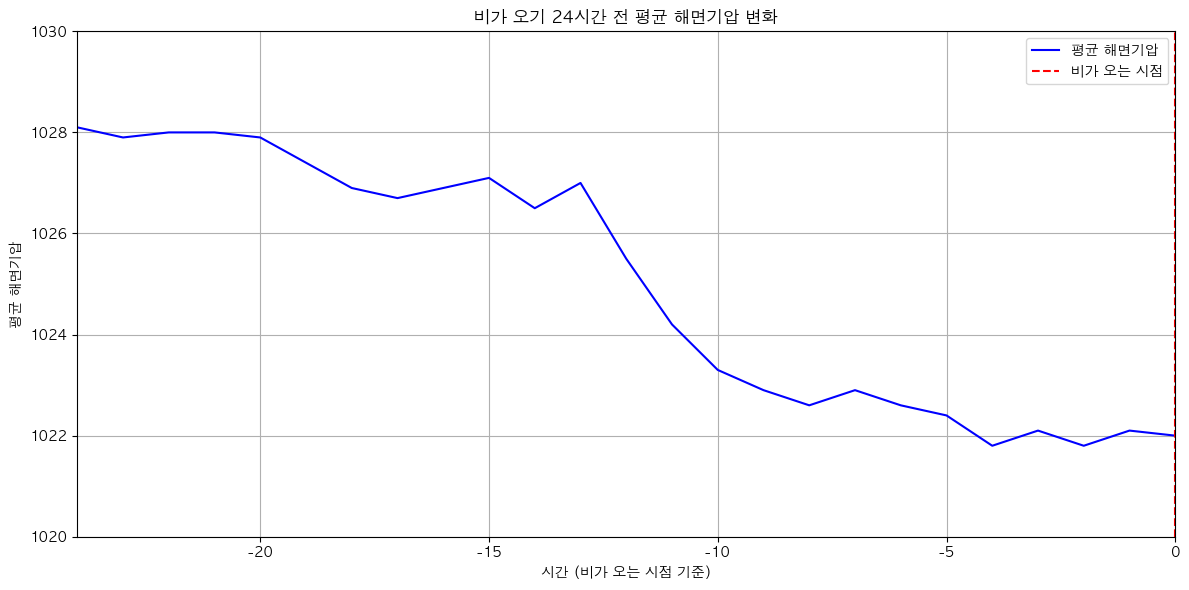

In [11]:
mean_data = all_periods.groupby('relative_time')['ps'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 해면기압', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 해면기압')
plt.ylim([1020, 1030])
plt.title('비가 오기 24시간 전 평균 해면기압 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

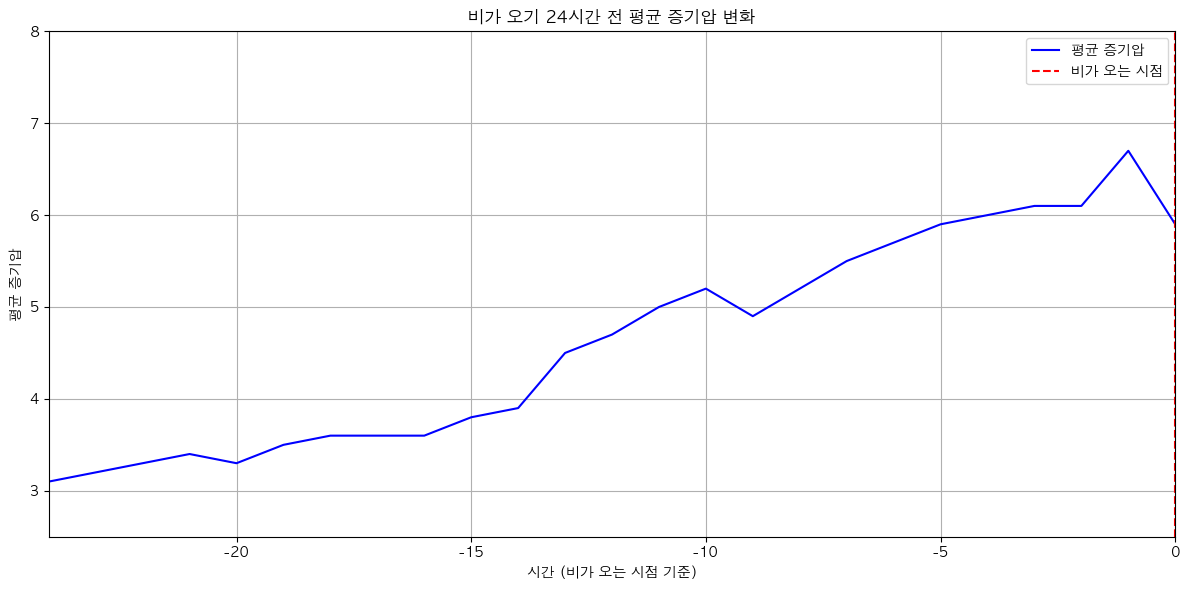

In [12]:
mean_data = all_periods.groupby('relative_time')['pv'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 증기압', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 증기압')
plt.ylim([2.5, 8])
plt.title('비가 오기 24시간 전 평균 증기압 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

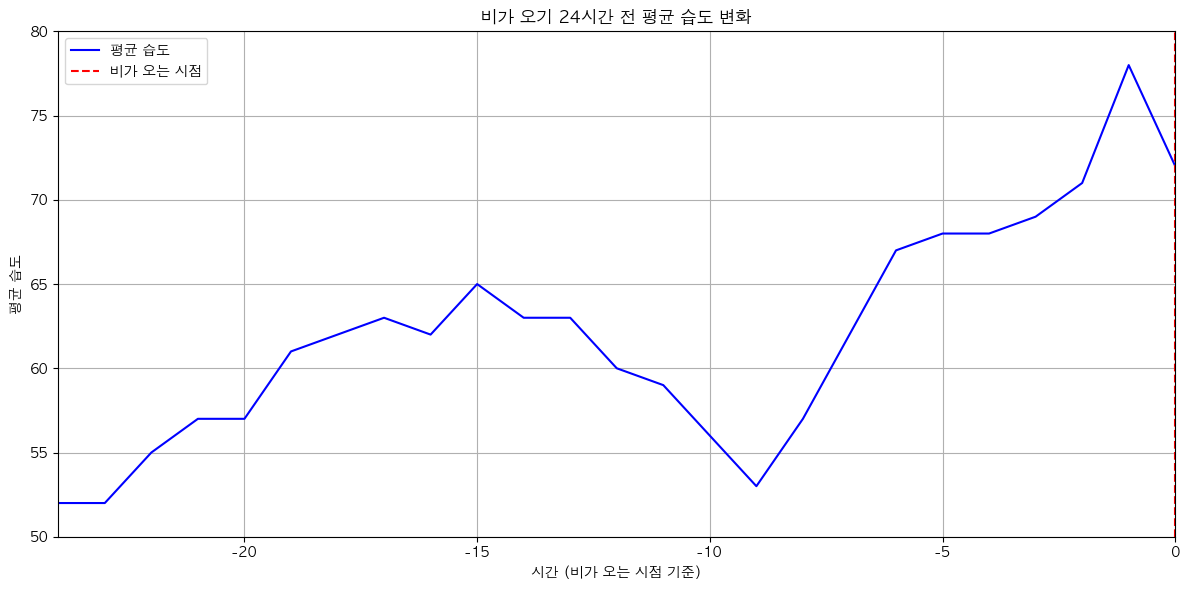

In [13]:
mean_data = all_periods.groupby('relative_time')['hm'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 습도', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 습도')
plt.ylim([50, 80])
plt.title('비가 오기 24시간 전 평균 습도 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

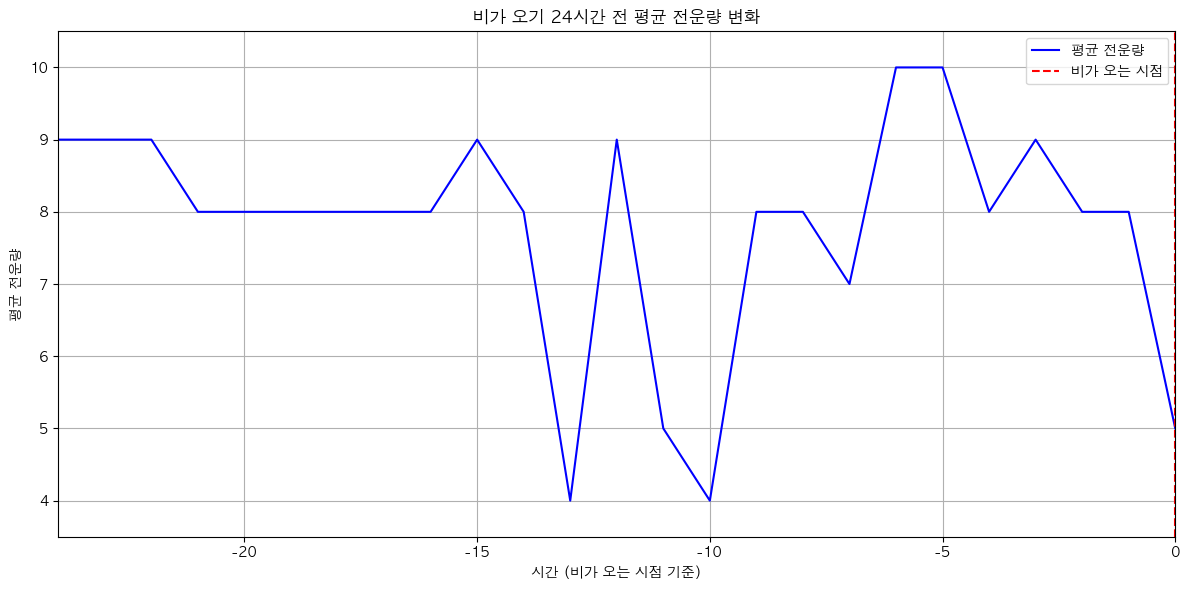

In [14]:
mean_data = all_periods.groupby('relative_time')['dc10Tca'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 전운량', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 전운량')
plt.ylim([3.5, 10.5])
plt.title('비가 오기 24시간 전 평균 전운량 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

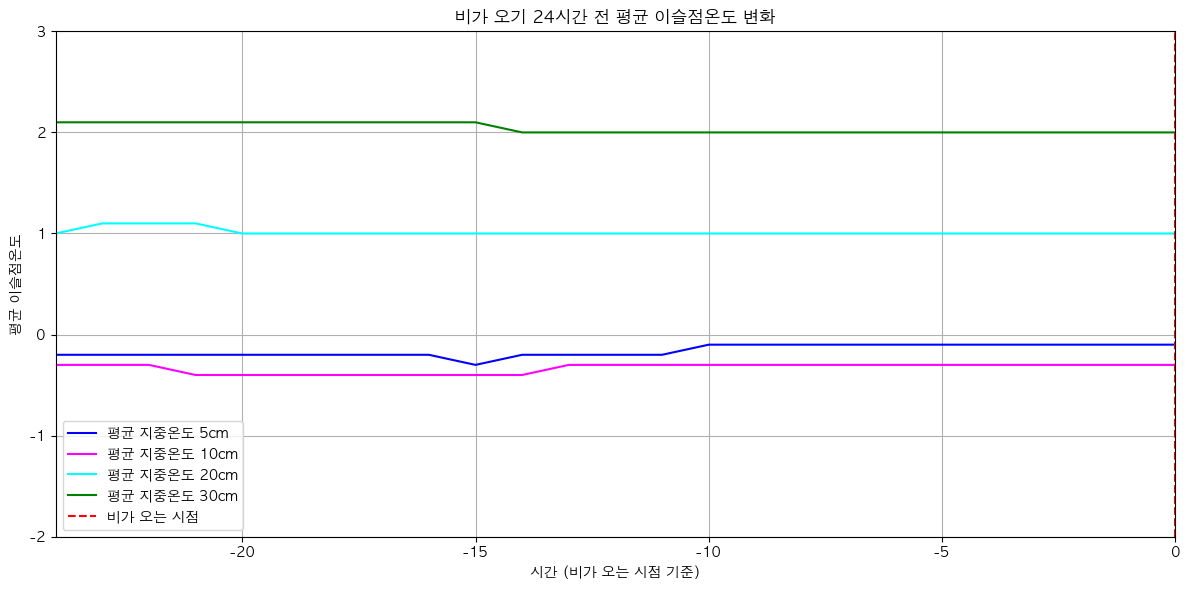

In [15]:
mean_data = all_periods.groupby('relative_time')[['m005Te','m01Te','m02Te','m03Te']].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.m005Te, label='평균 지중온도 5cm', color='blue')
plt.plot(mean_data.index, mean_data.m01Te, label='평균 지중온도 10cm', color='magenta')
plt.plot(mean_data.index, mean_data.m02Te, label='평균 지중온도 20cm', color='cyan')
plt.plot(mean_data.index, mean_data.m03Te, label='평균 지중온도 30cm', color='green')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 이슬점온도')
plt.ylim([-2, 3])
plt.title('비가 오기 24시간 전 평균 이슬점온도 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

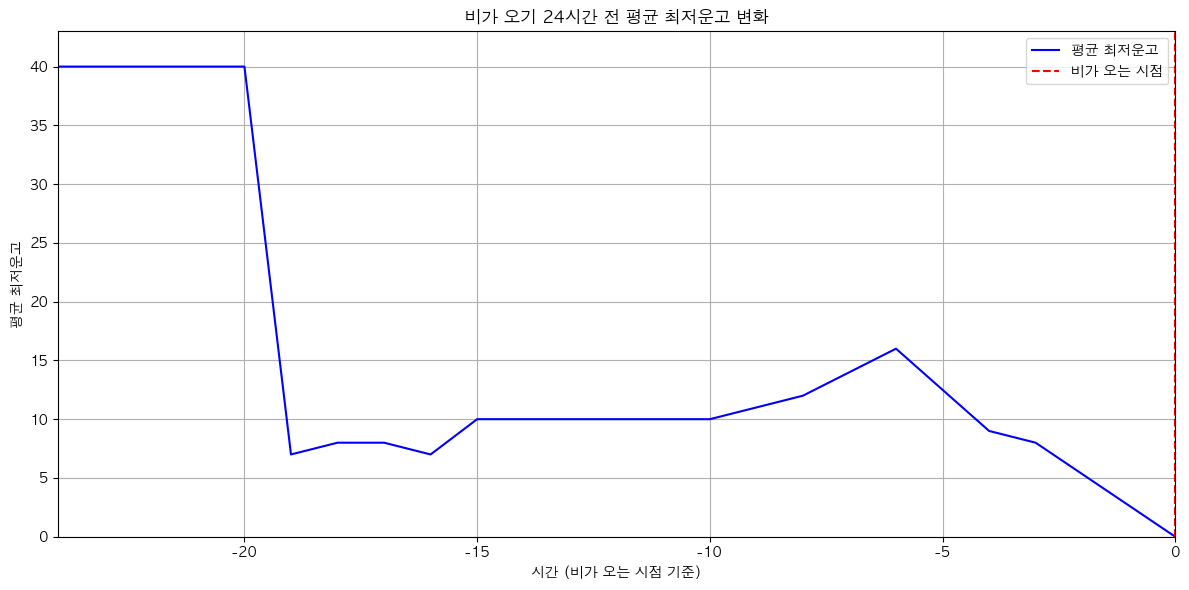

In [16]:
mean_data = all_periods.groupby('relative_time')['lcsCh'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 최저운고', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 최저운고')
plt.ylim([0, 43])
plt.title('비가 오기 24시간 전 평균 최저운고 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

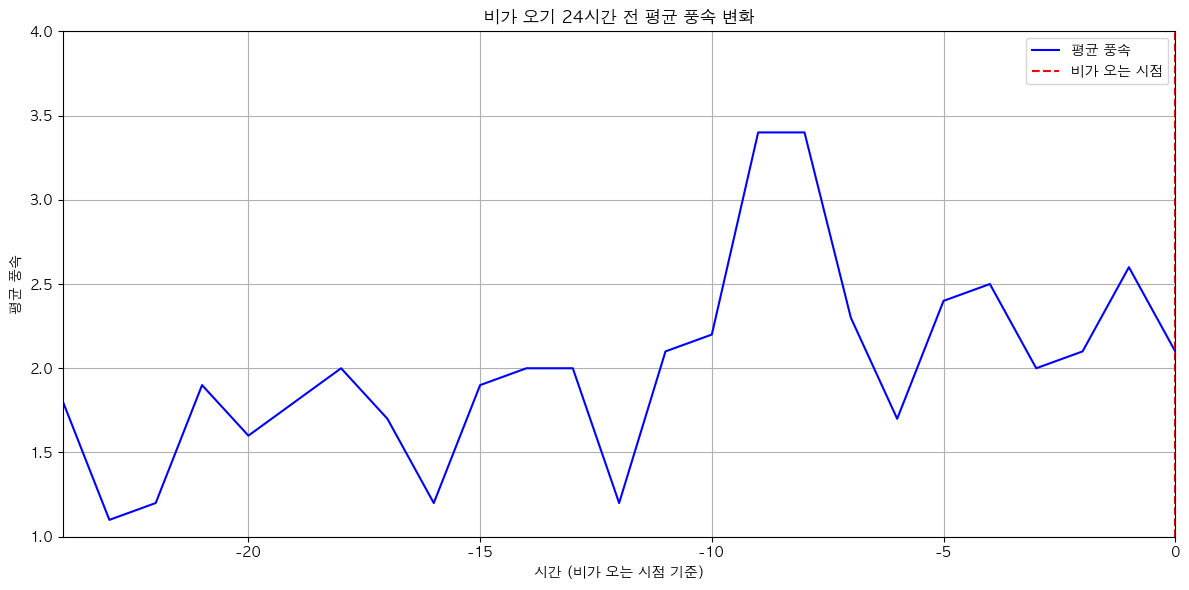

In [17]:
mean_data = all_periods.groupby('relative_time')['ws'].mean()

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(mean_data.index, mean_data.values, label='평균 풍속', color='blue')

plt.axvline(x=0, color='red', linestyle='--', label='비가 오는 시점')  # 비가 오는 시점 표시
plt.xlabel('시간 (비가 오는 시점 기준)')
plt.xlim([-24, 0])
plt.ylabel('평균 풍속')
plt.ylim([1.0, 4.0])
plt.title('비가 오기 24시간 전 평균 풍속 변화')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()